In [1]:
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

# untuk membuat colormap yang sudah ditentukan
from matplotlib.colors import ListedColormap

# untuk menghitung frekuensi elemen dalam koleksi data
from collections import Counter

# untuk menghitung Variance Inflation Factor (VIF) dalam regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk normalisasi dan transformasi data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# untuk pembagian dataset dan validasi model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# untuk membangun pipeline pemrosesan data dan model
from sklearn.pipeline import Pipeline

# untuk model K-Nearest Neighbors (klasifikasi dan regresi)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# untuk model Decision Tree (klasifikasi dan regresi) dan visualisasi pohon keputusan
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# untuk model regresi linear dan regresi logistik (termasuk Lasso dan Ridge)
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

# untuk ensemble voting classifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# untuk neural network model
from sklearn.neural_network import MLPClassifier

# untuk model XGBoost
from xgboost.sklearn import XGBClassifier

# untuk evaluasi model klasifikasi dan regresi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, mean_squared_error, RocCurveDisplay, mean_absolute_percentage_error

# untuk mengakses metric scoring yang ada di sklearn
from sklearn.metrics._scorer import _SCORERS

# untuk mengaktifkan iterative imputer yang masih eksperimental
from sklearn.experimental import enable_iterative_imputer

# untuk metode imputasi data yang hilang
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

# untuk encoding variabel kategori
import category_encoders as ce

# untuk mengabaikan peringatan yang tidak diinginkan
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_california = pd.read_csv('dataset/data_california_house.csv')
df_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
df_california.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

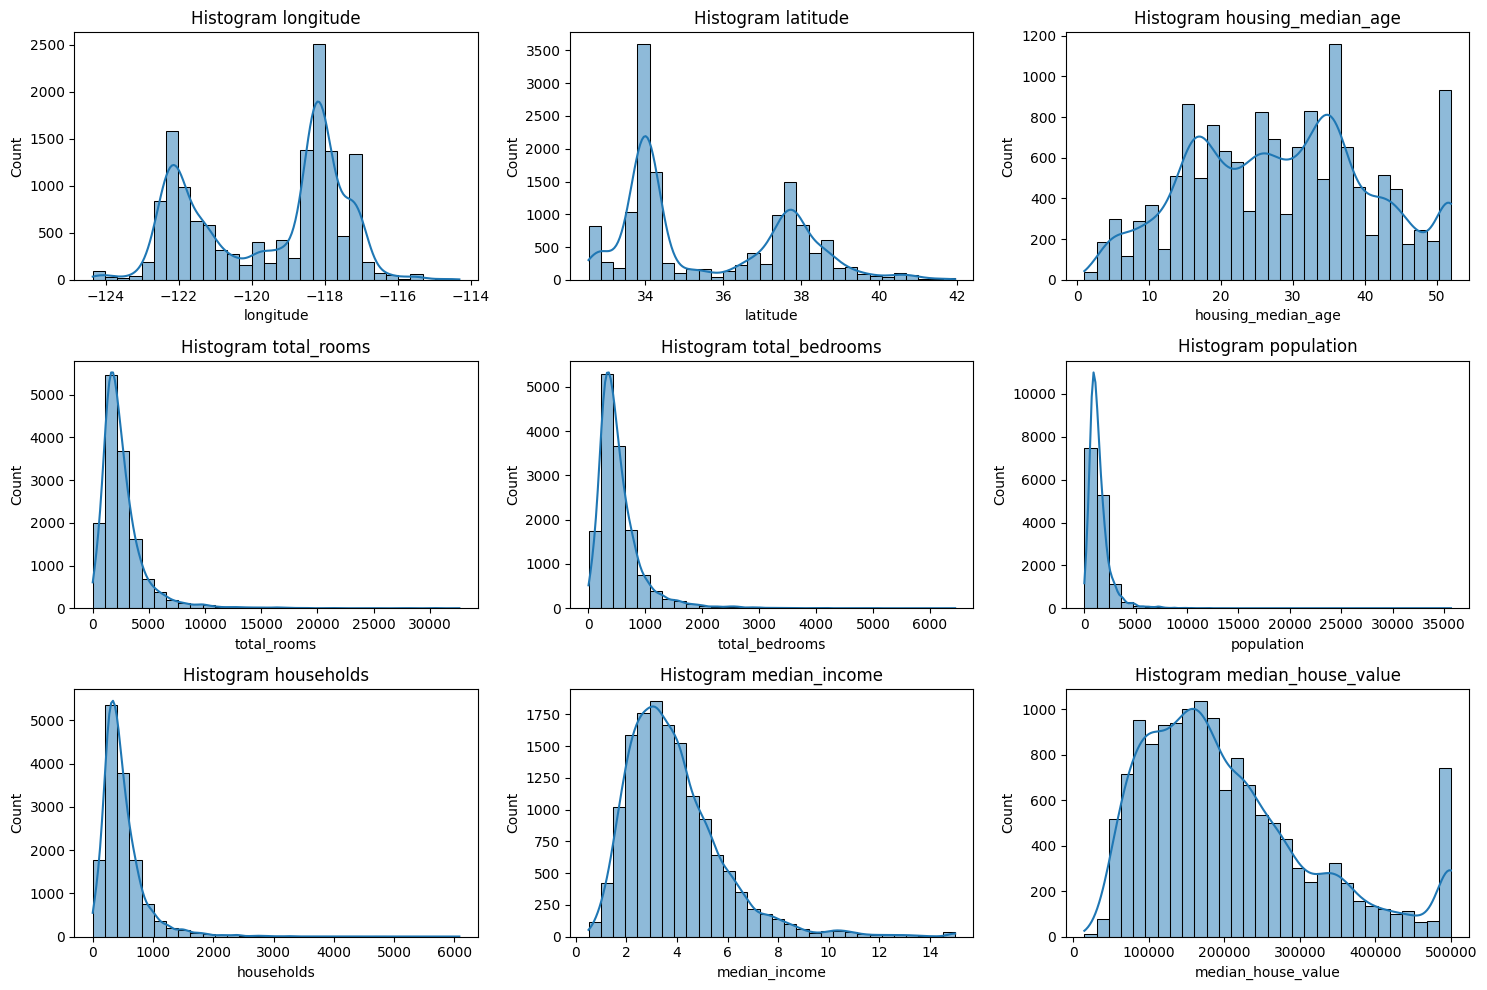

In [6]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_california[column], kde=True, bins=30)
    plt.title(f'Histogram {column}')
    # plt.xlabel(column)
plt.tight_layout()
plt.show()

In [7]:
df_california.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [8]:
display(df_california.describe().T,
        df_california.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


,count,unique,top,freq
ocean_proximity,14448,5,<1H OCEAN,6369


In [9]:
# ColumnTransformer untuk pipeline
numeric_features = df_california.select_dtypes(include=['float64']).columns
categorical_features = ['ocean_proximity']

In [10]:
import pandas as pd
from scipy.stats import shapiro

# Example DataFrame creation (replace with your actual data)
np.random.seed(0)
df_ = pd.DataFrame(np.random.randn(100, 9), columns=['longitude', 'latitude', 'housing_median_age', 
                                                               'total_rooms', 'total_bedrooms', 'population', 
                                                               'households', 'median_income', 'median_house_value'])

# Initialize an empty list to store results
results = []

# Perform Shapiro-Wilk test for each column
for column in ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
               'total_bedrooms', 'population', 'households', 
               'median_income', 'median_house_value']:
    stat, p = shapiro(df_[column])
    if p > 0.05:
        normality = f'{column}. So, we assume a normal distribution'
    else:
        normality = f'\t {column} Not Normal Distribution (reject H0)'
    results.append({'Column': column, 'Statistics': stat, 'p-value': p, 'Normality': normality})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
print("Shapiro-Wilk Test Results:")
print(results_df.to_string(index=False))


Shapiro-Wilk Test Results:
            Column  Statistics  p-value                                               Normality
         longitude    0.991657 0.795850          longitude. So, we assume a normal distribution
          latitude    0.979150 0.114100           latitude. So, we assume a normal distribution
housing_median_age    0.988397 0.537938 housing_median_age. So, we assume a normal distribution
       total_rooms    0.988243 0.526326        total_rooms. So, we assume a normal distribution
    total_bedrooms    0.991716 0.800300     total_bedrooms. So, we assume a normal distribution
        population    0.975191 0.055844         population. So, we assume a normal distribution
        households    0.991620 0.793081         households. So, we assume a normal distribution
     median_income    0.994030 0.941726      median_income. So, we assume a normal distribution
median_house_value    0.987253 0.454849 median_house_value. So, we assume a normal distribution


In [11]:
import matplotlib.image as mpimg

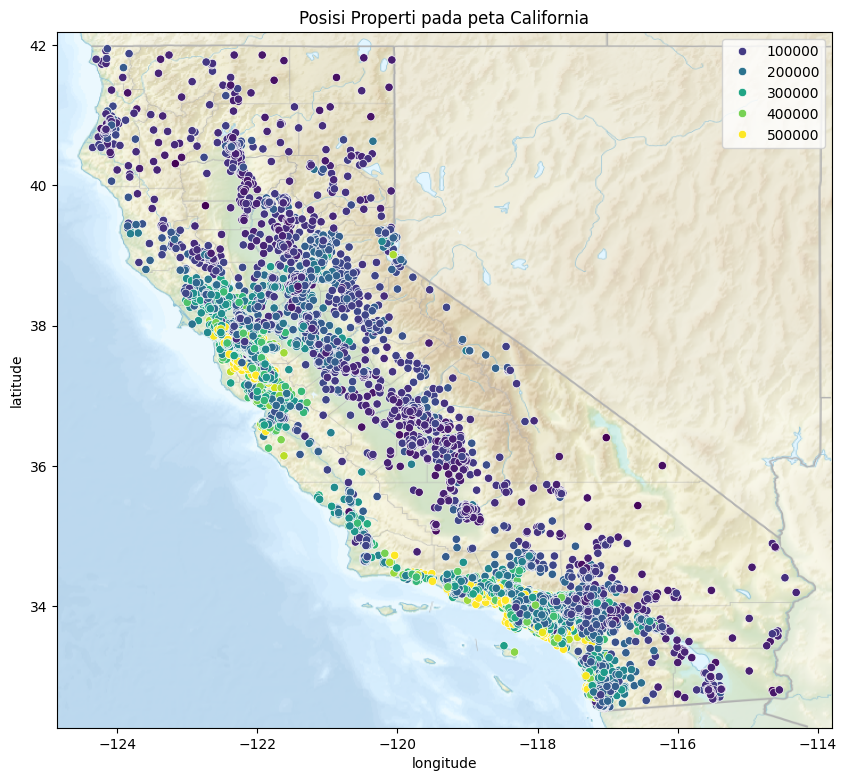

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['median_house_value'],palette='viridis').set_title('Posisi Properti pada peta California')

# Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
california = mpimg.imread('dataset\california.png')
plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# Menampilkan legenda
plt.legend()

plt.show()


In [13]:
corelation = df_california.drop('ocean_proximity', axis=1).corr(method='spearman')
corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


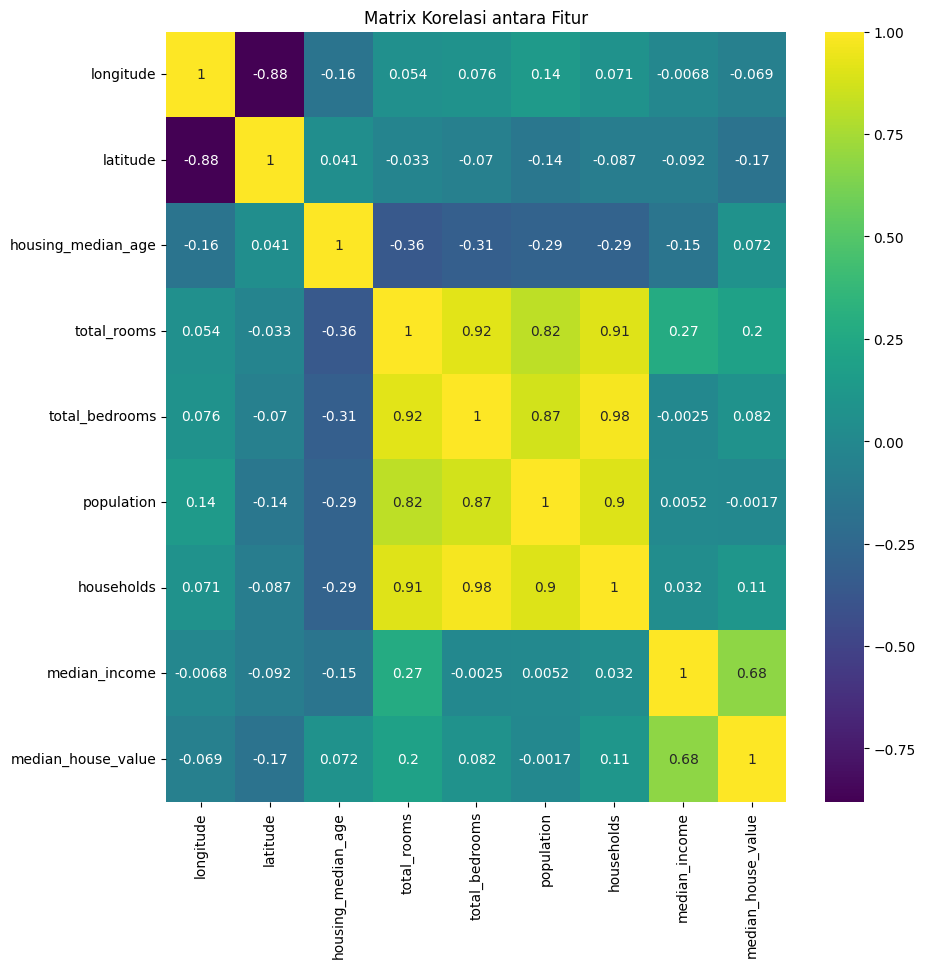

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,cmap='viridis').set_title('Matrix Korelasi antara Fitur')
plt.show()

# Fill Missing Value

In [15]:
df_california['total_bedrooms'].fillna(df_california['total_bedrooms'].median(), inplace=True)

In [16]:
import statsmodels.api as sm

In [25]:
# Summary
# apply the multiple linear regression

Y = df_california['median_house_value']
x = sm.add_constant(df_california[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])

display(Y,x)

0         47500.0
1        100000.0
2        285800.0
3        175000.0
4         59200.0
           ...   
14443    144600.0
14444    159400.0
14445    289300.0
14446    484600.0
14447     69400.0
Name: median_house_value, Length: 14448, dtype: float64

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750
1,1.0,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604
2,1.0,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990
3,1.0,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199
4,1.0,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206
...,...,...,...,...,...,...,...,...,...
14443,1.0,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125
14444,1.0,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135
14445,1.0,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977
14446,1.0,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315


In [26]:
# execute
sm_lm = sm.OLS(Y,x)
result = sm_lm.fit()

In [27]:
# show the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3185.
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:11:52   Log-Likelihood:            -1.8156e+05
No. Observations:               14448   AIC:                         3.631e+05
Df Residuals:                   14439   BIC:                         3.632e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.59e+06   7.49